# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [1]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install 
!pip install auto-sklearn
!pip install sweetviz 
#uncomment the above if you need to install the library 
#!pip install auto-sklearn
#uncomment the above if you need to install the library 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   259  100   259    0     0    625      0 --:--:-- --:--:-- --:--:--   625
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.8 MB/s 
  Attempting

In [2]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Part One

## EDA

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


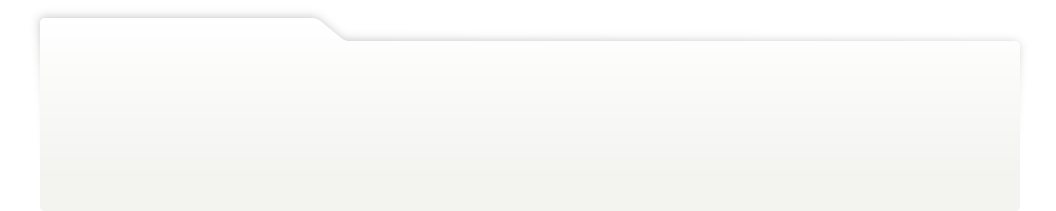
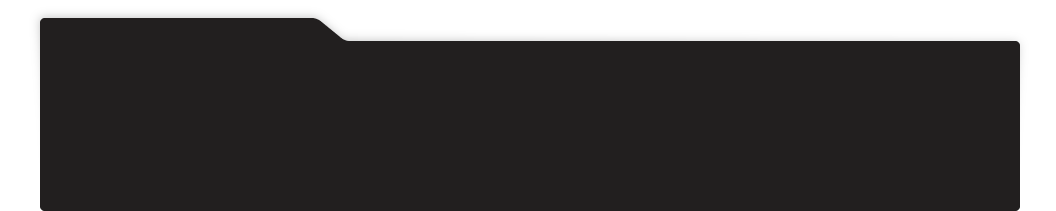
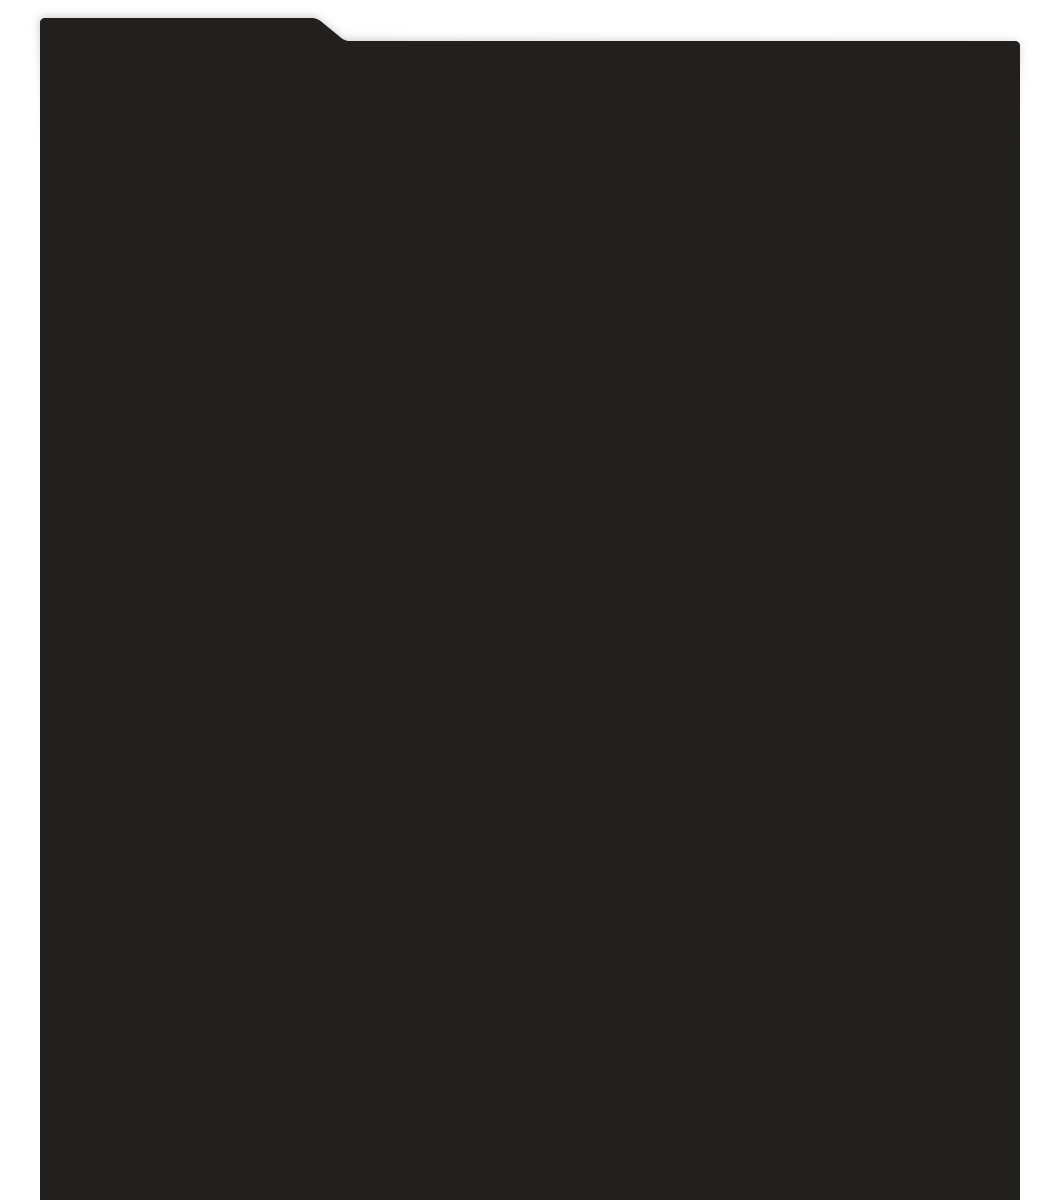
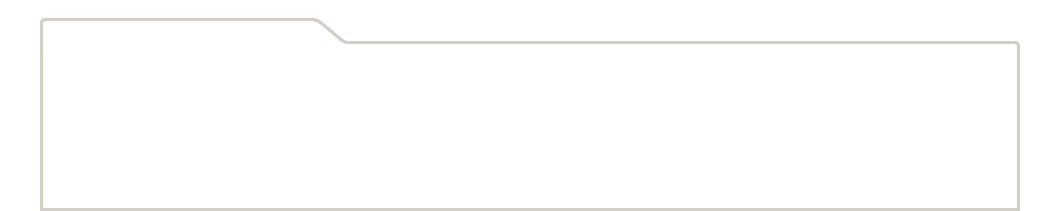
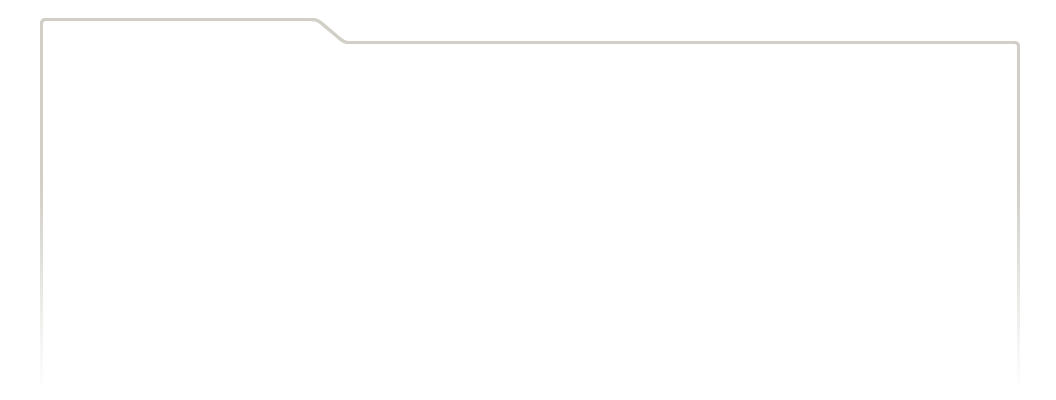
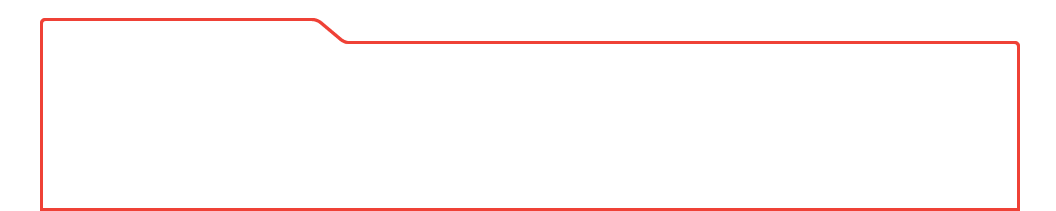
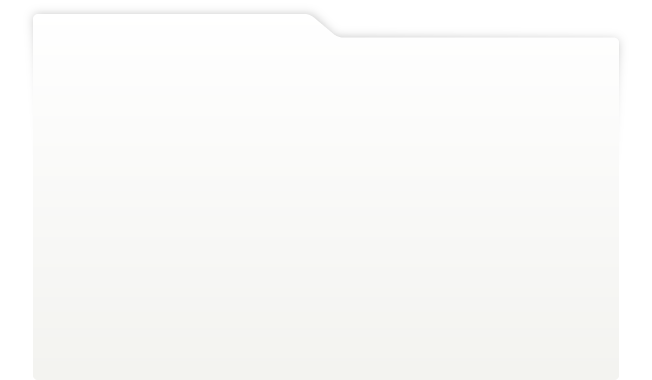
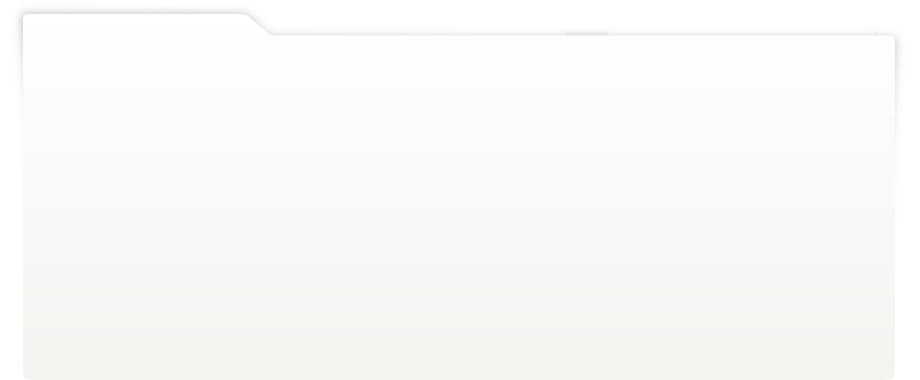
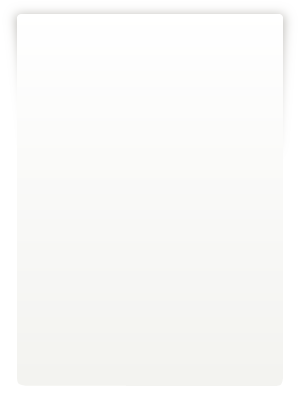
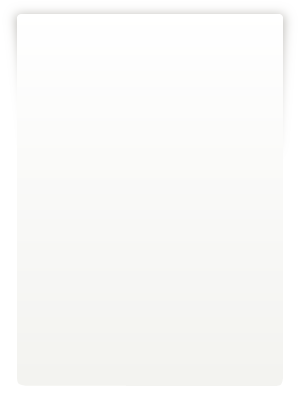
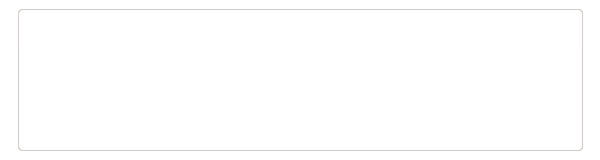
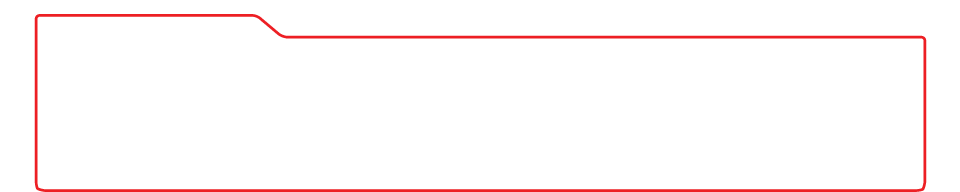
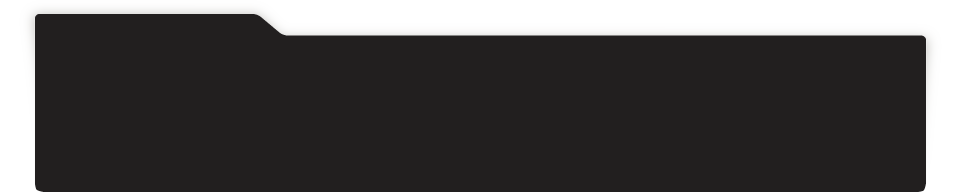
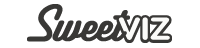
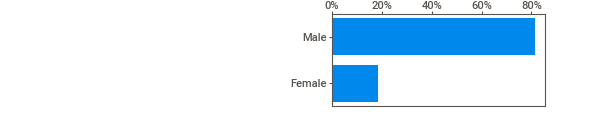
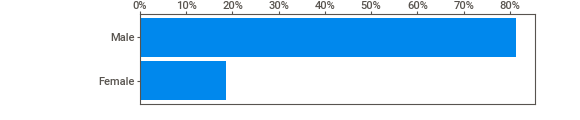
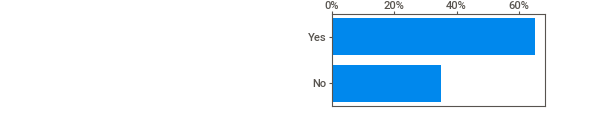
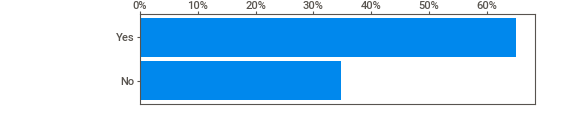
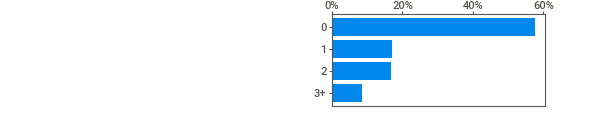
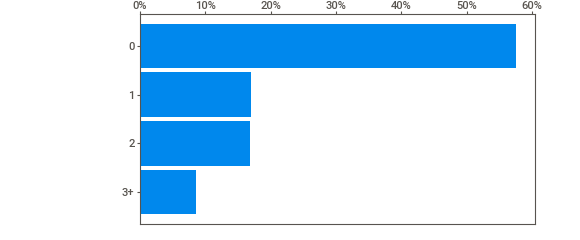
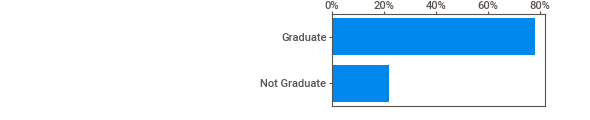
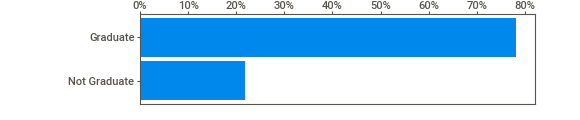
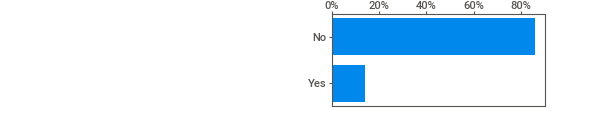
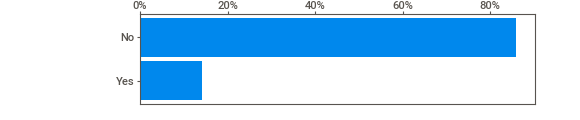
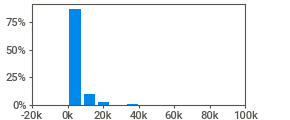
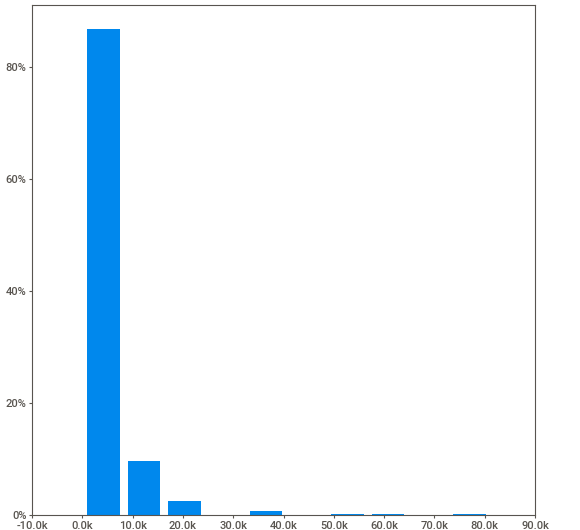
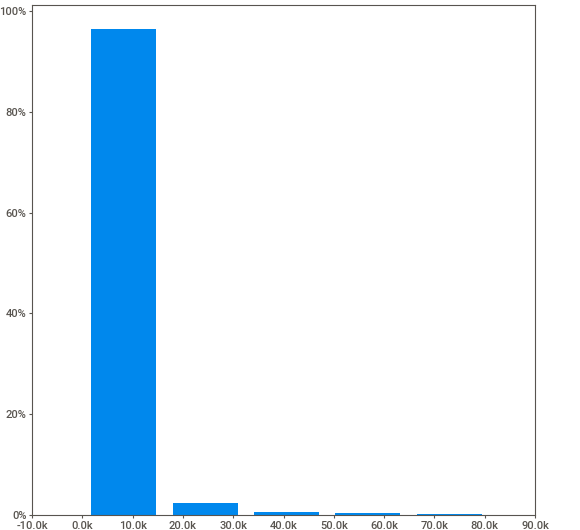
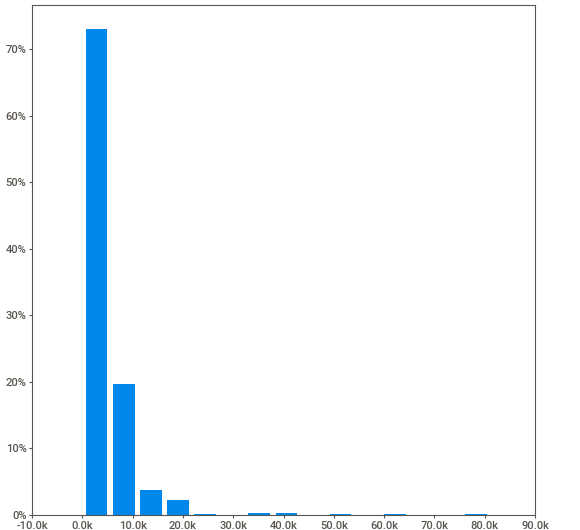
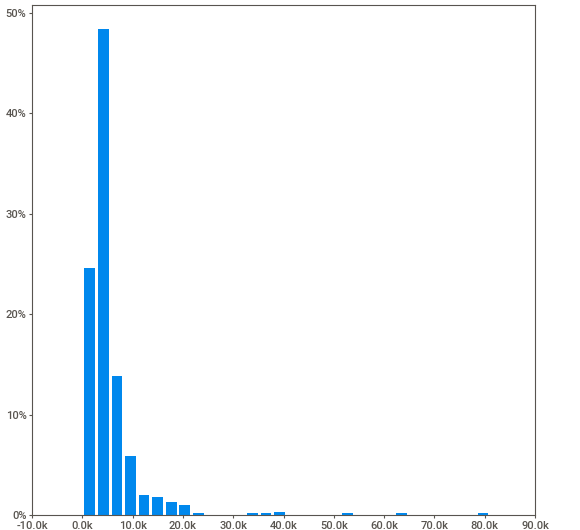
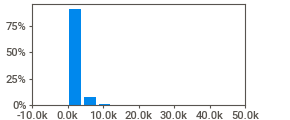
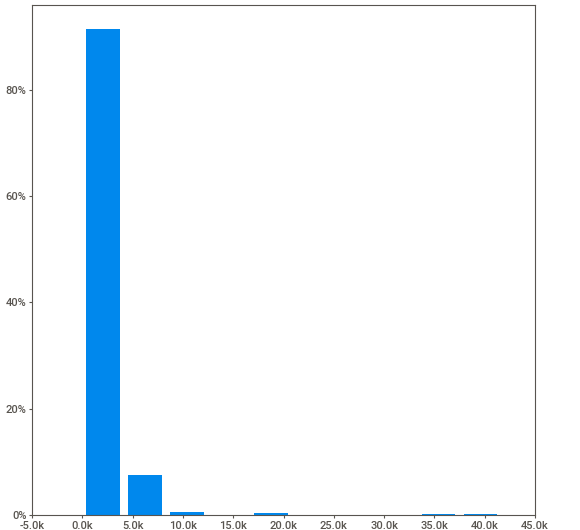
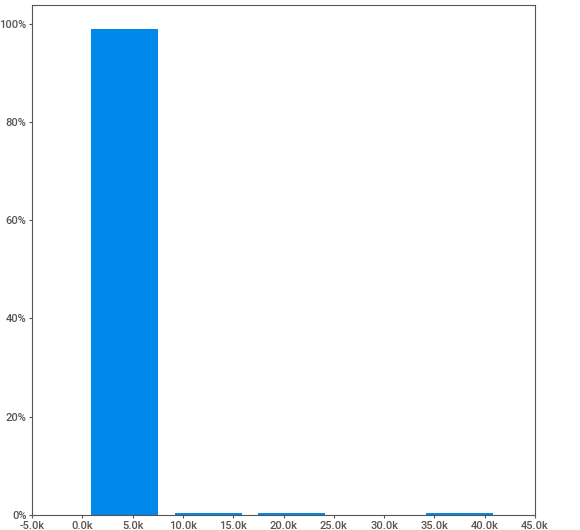
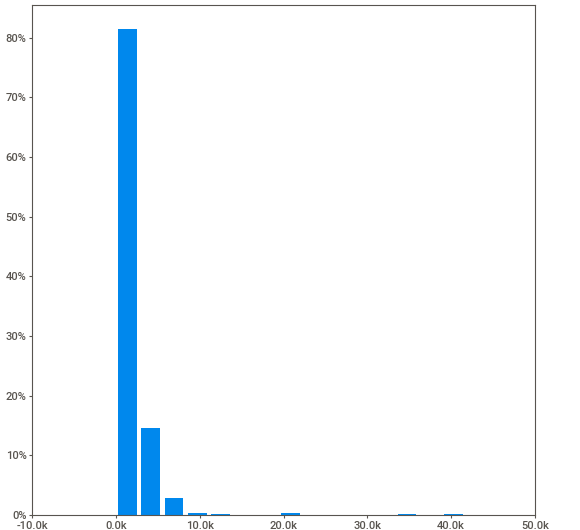
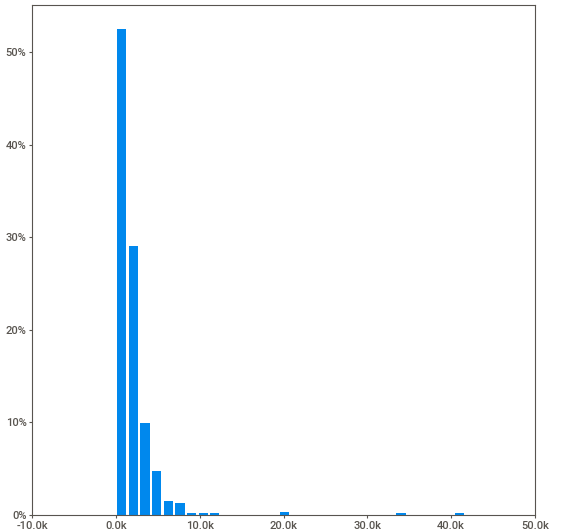
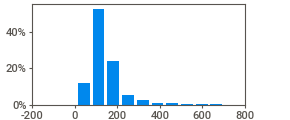
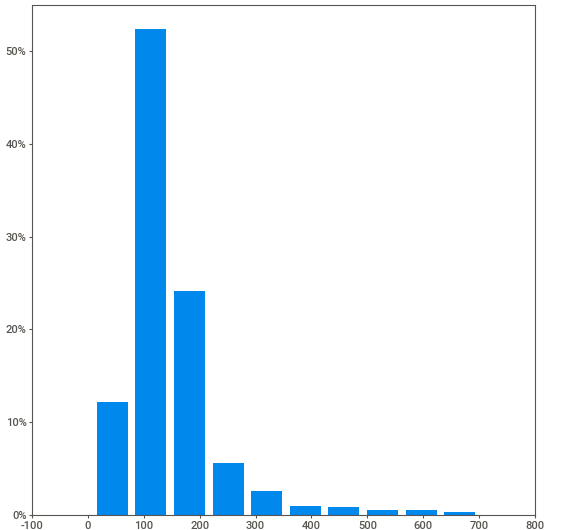
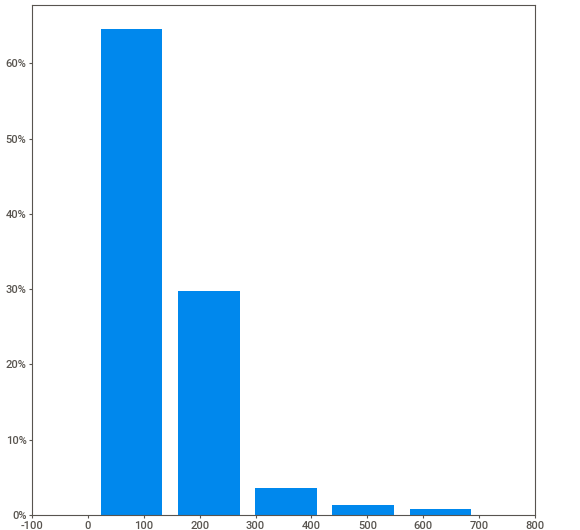
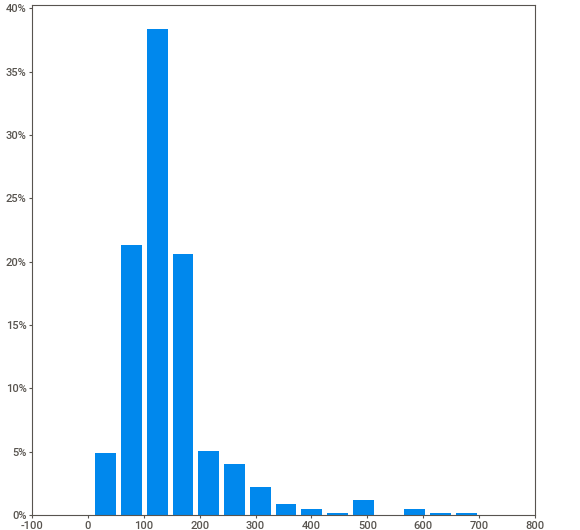
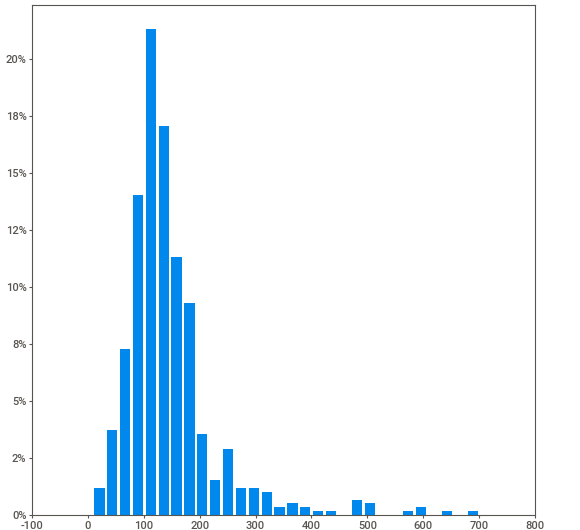
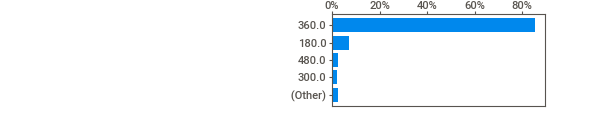
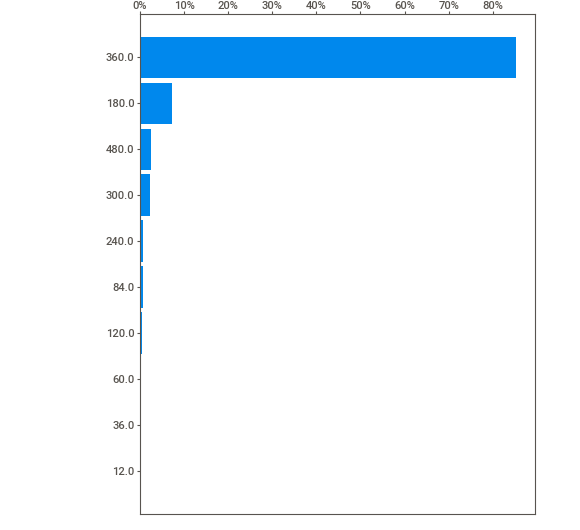
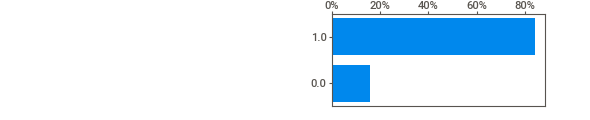
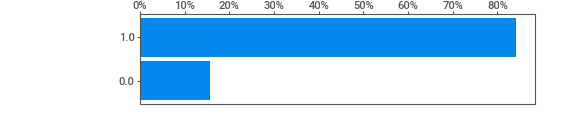
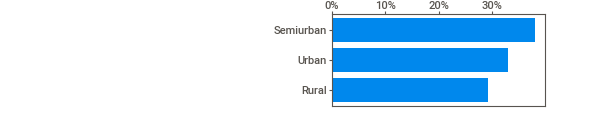
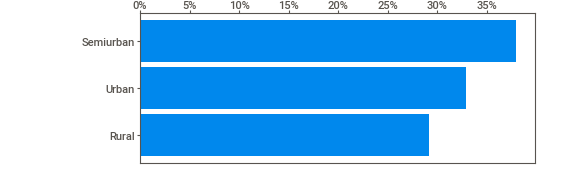
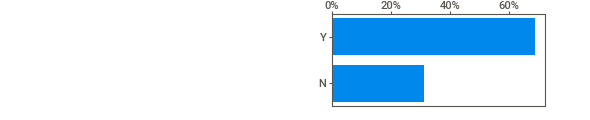
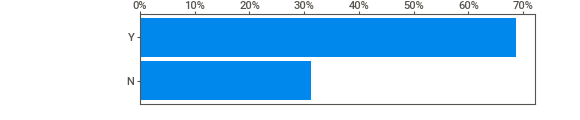
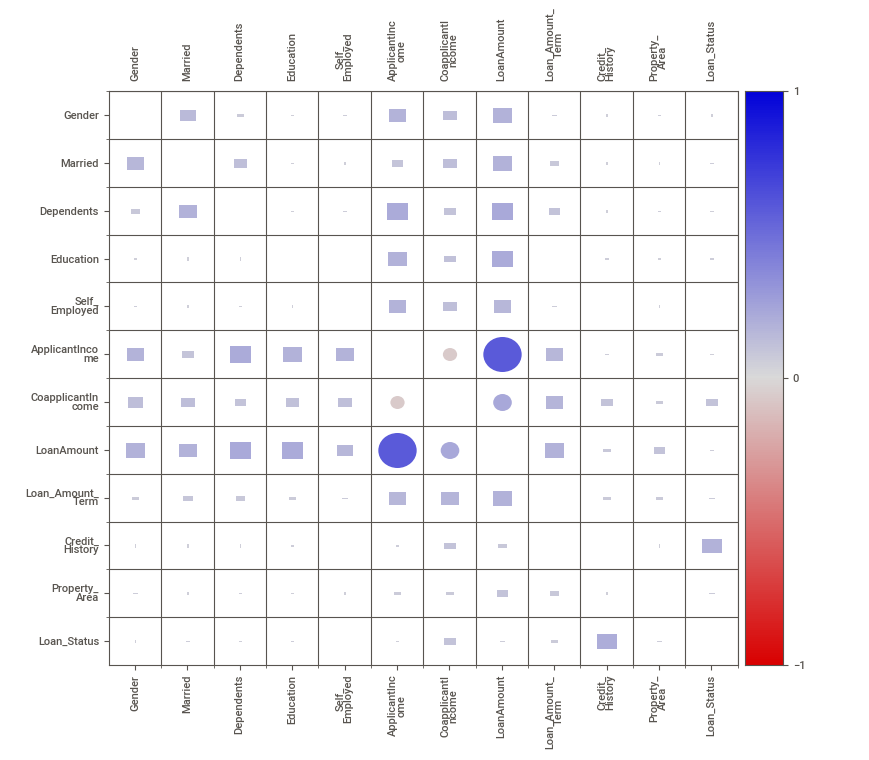
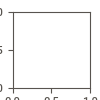

In [9]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA 


In [10]:
# The Shape of test,train & the whole dataset together

print('The shpae of the data set: ',df.shape)
print('The shape of train set: ',train.shape)
print('The shape of test set :',test.shape)

The shpae of the data set:  (981, 13)
The shape of train set:  (614, 13)
The shape of test set : (367, 12)


# 1. The next few columns few show the over view of both test and train data

#      i.e Shape of dataframe,Data types of the columns  and any null values in the columns

In [11]:
#The descriptive statistics of the dataframe df and its column datatypes 

print('The columns in dataframe df :',df.columns)
print(df.info())
print(df.describe())
print(df.describe(include ='object'))


The columns in dataframe df : Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float

In [12]:
#The sum of null values in each columns in dataframe df

df.isnull().sum().sort_values(ascending=False)

Loan_Status          367
Credit_History        79
Self_Employed         55
LoanAmount            27
Dependents            25
Gender                24
Loan_Amount_Term      20
Married                3
Loan_ID                0
Education              0
ApplicantIncome        0
CoapplicantIncome      0
Property_Area          0
dtype: int64

In [13]:
#The descriptive statistics of the dataframe test and column types 
print('the columns in the dataframe test: ',test.columns)
print(test.info())
print(test.describe())
print(test.describe(include='object'))

the columns in the dataframe test:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  P

In [14]:
#The descriptive statistics of the dataframe train and the datatype of the columns

print('the columns in the dataframe train :',train.columns)
print(train.info())
print(train.describe())
print(train.describe(include='object'))

the columns in the dataframe train : Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null  

# 2. Null Values in the dataframe test & train dataset

#

In [15]:
#The sum of null values in each columns

test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [16]:


train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

**There are some missing values in both the datasets**

# Number of duplicates in train & test dataset.


In [17]:
#Number of duplicates in dataframe train

train.duplicated().sum()

0

In [18]:
# Numbers of duplicates in the dataframe test

test.duplicated().sum()

0

**from the above code results we can see there is no duplicated values in both the datasets**

# Earlier we have checked for the duplicates in the values in the dataset, now we are going to check any duplicated columns in the Datasets

In [19]:
#checking any duplicated columns in the dataframe

test.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

#

In [20]:
#checking any duplicated columns in the dataframe

train.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

**The above array of Fasle that there is no duplicated columns in the dataset**

# Now replacing the null values in the respective columns in the train dataset by most repeated values in the each column in the dataset.

In [21]:
#Replacing the null values with mode(Most repeated value in the respective column ) using mode function in numpy library for better prediction and analysis

null_columns=['Credit_History' ,'Self_Employed','LoanAmount','Dependents','Loan_Amount_Term','Gender','Married']
for i in null_columns:
  null=train[i].mode()[0]
  train[i] = train[[i]].fillna(null)
  print(train[i].isnull().sum())



0
0
0
0
0
0
0


In [22]:

train.duplicated().sum()

0

In [23]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After replacing the null values we dont have any null values in the dataframe train


# 3. Comparing the Loan status with the each categorical column in the train dataset , First we are counting values in Loan Status

Y    422
N    192
Name: Loan_Status, dtype: int64


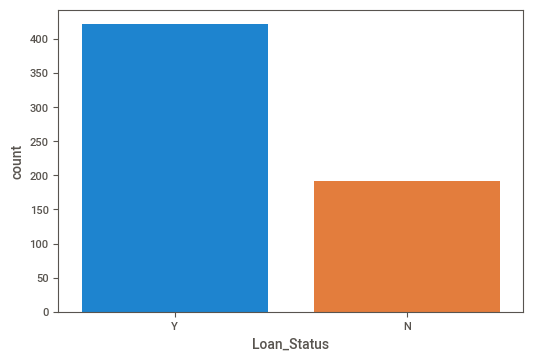

In [24]:
#The count of Loan status
print(train['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status',data=train)

In [149]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [150]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

The count of values in columns(Education,Self Employed,Property Area,Dependent,Married,Gender)


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


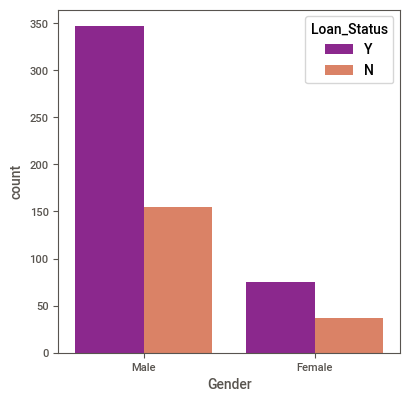

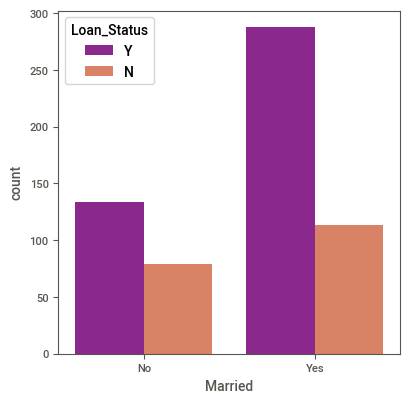

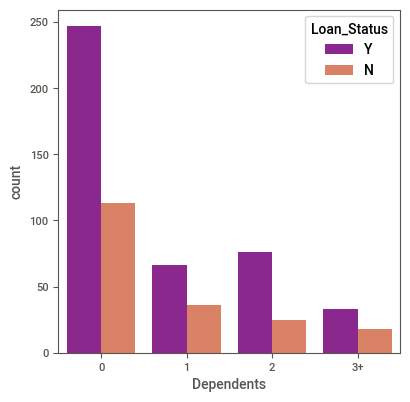

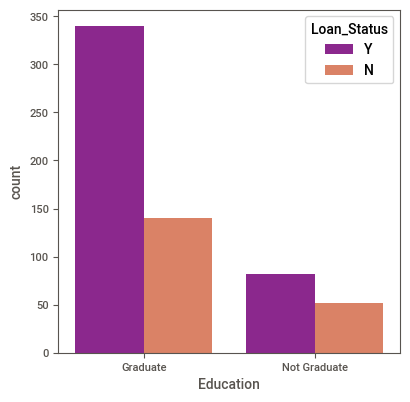

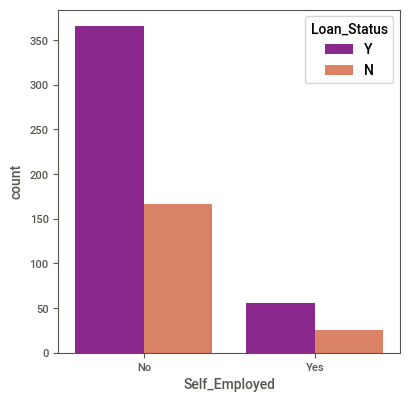

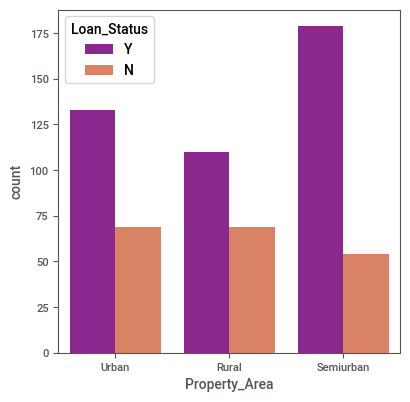

In [25]:


obj = train.select_dtypes('object').columns.tolist()
print(obj)
for i in obj[1:-1]:
  plt.figure(figsize=(15,10))
  plt.subplot(2,3,1)
  sns.countplot(x=i,hue='Loan_Status',palette='plasma',data=train)
  plt.xlabel(i)

#5.Counting the number of dependents and independents 
# if we take count of zeros and non zeros , we can easily find the number of dependents and independents

In [26]:
# Counting the number of non zero dependents
# creating a dataframe and taking conts zero and non zeros

train['Dependents'].value_counts().to_frame()

,Dependents
0,360
1,102
2,101
3+,51


In [27]:
count=(train['Dependents'] != str(0)).sum()
count

254

In [153]:
train[train['Dependents'] != '0'].shape[0]/train.shape[0]

0.41368078175895767

There are totally 254 have dependents and 360 people don't have dependents.




In [28]:
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [29]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#8. Finding the correlation between Applicant Income and the Loan Amount before removing the Outliers .

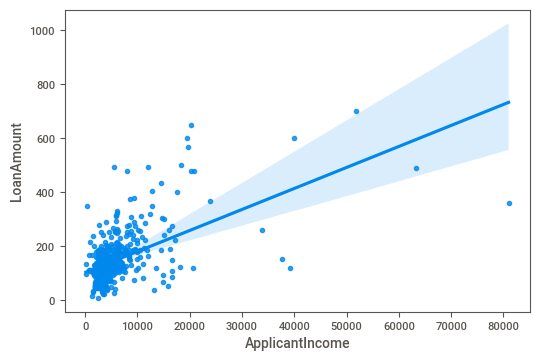

In [30]:
#Relation between applicant income and loan amount

sns.regplot(x='ApplicantIncome',y='LoanAmount',data=train)


there exist a relation between applicantincome and loan amount

In [31]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000


**Correlation between the numerical features in heat map**

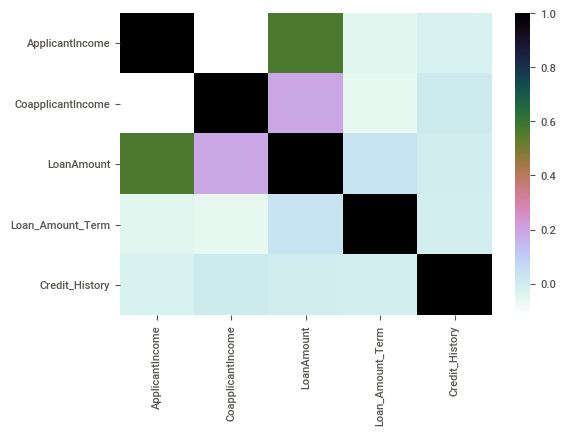

In [32]:
# correlation between the numerical columns using heatmap before removing outliers.


sns.heatmap(train.corr() ,cmap='cubehelix_r')

In [34]:
train_gb= train[['Credit_History','Loan_Status']]
train_gb=train_gb.groupby(['Credit_History']).Loan_Status.count()
train_gb

Credit_History
0.0     89
1.0    525
Name: Loan_Status, dtype: int64

In [35]:
train['ApplicantIncome'].corr(train['LoanAmount'])

0.5646981704353977

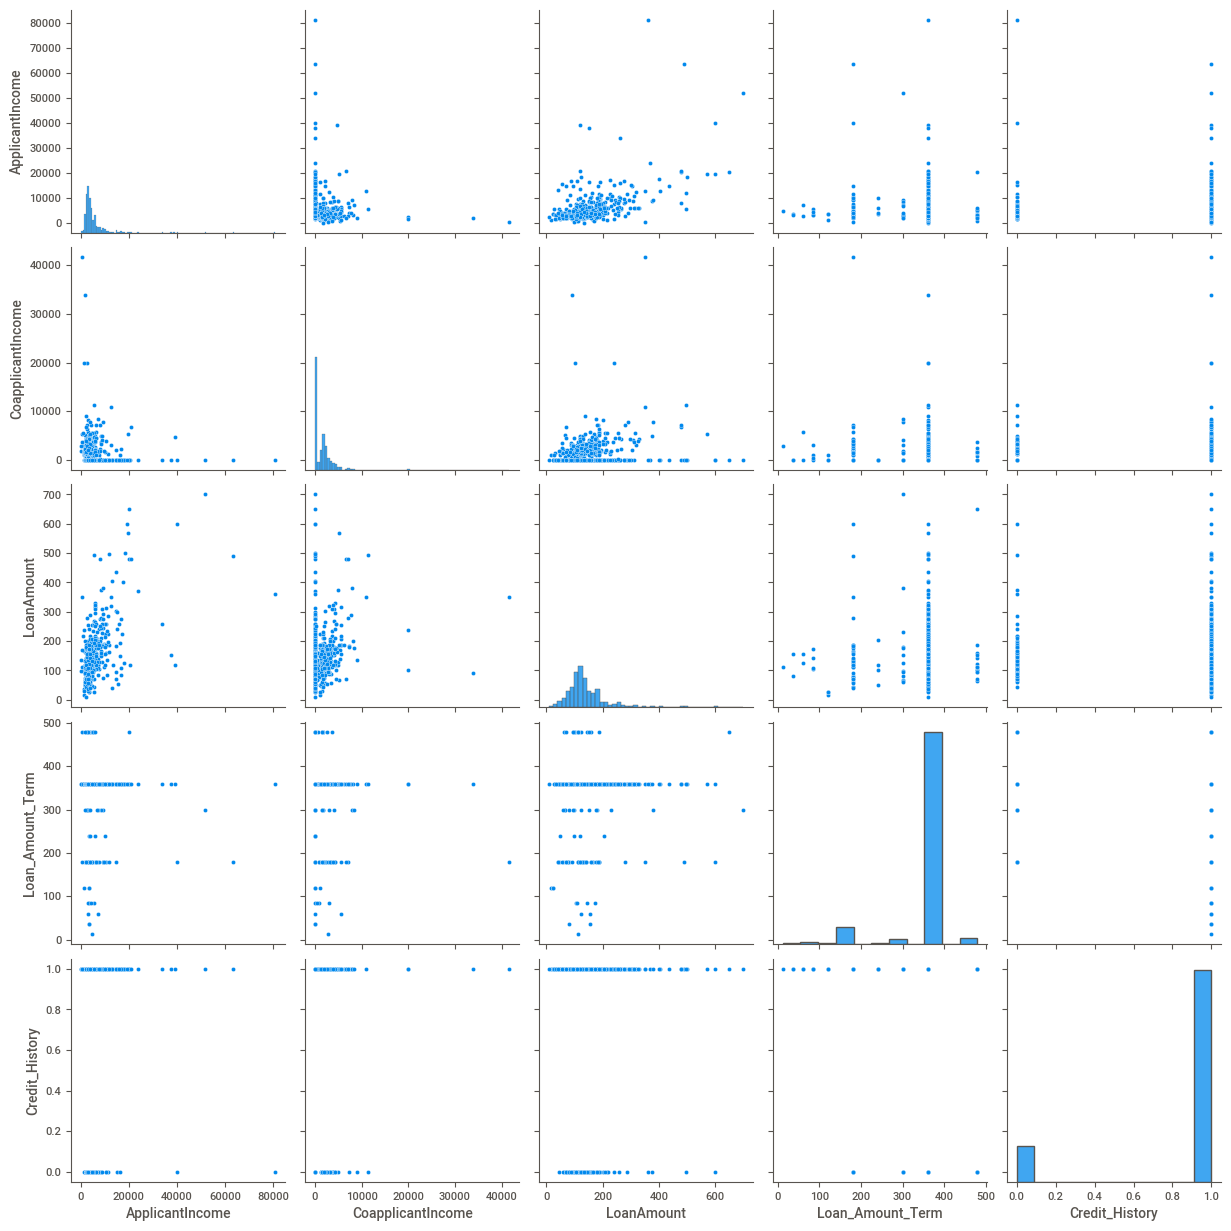

In [36]:
sns.pairplot(train)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


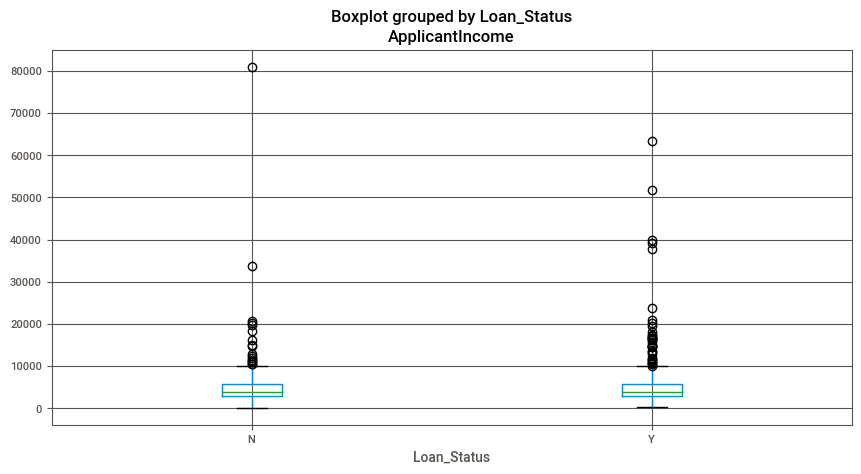

In [37]:
# Counting the Number of Loan Approvals & Rejection in train data set

train.boxplot(column='ApplicantIncome',by='Loan_Status',figsize=(10,5))

In [38]:
# Counting the number of property areas

count_area =pd.DataFrame(df['Property_Area'].value_counts())
count_area.reset_index(inplace=True)
count_area.rename(columns={'index':'area'},inplace=True)


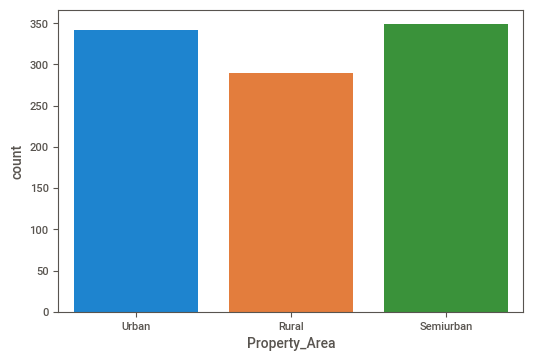

In [39]:
sns.countplot(x='Property_Area',data=df)

# 4.Comparing the Men and Women on defaulting the Home Loan

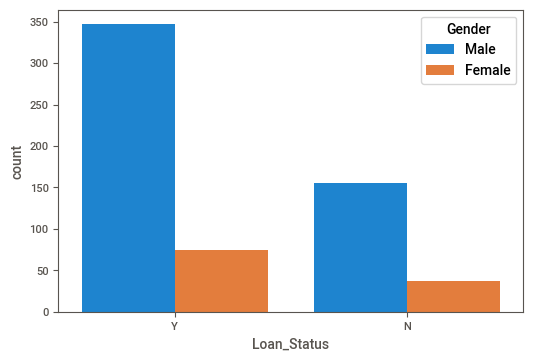

In [83]:
sns.countplot(x='Loan_Status',hue='Gender',data=train)

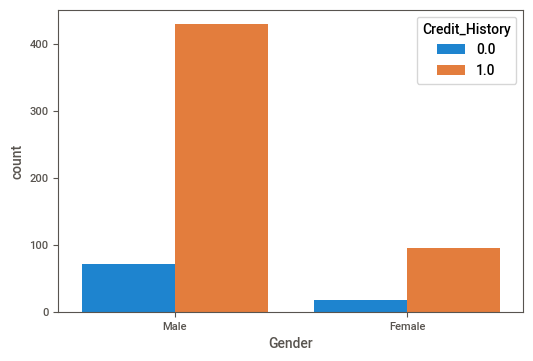

In [85]:
sns.countplot(x='Gender',hue='Credit_History',data=train)

In [151]:
train.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

In [152]:
train.groupby('Gender')['Loan_Status'].value_counts(normalize=True)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.691235
        N              0.308765
Name: Loan_Status, dtype: float64

# 6. Applicants income based on their Education and Employement

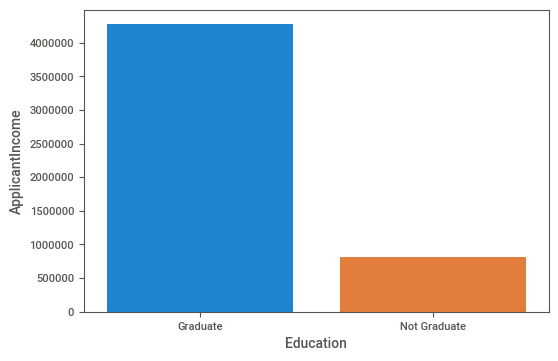

In [41]:
#Applicant income by Education

edu_inc = df[['Education','ApplicantIncome']]
edu_inc=edu_inc.groupby(['Education']).sum()
edu_inc.reset_index(inplace=True)
sns.barplot(x='Education',y='ApplicantIncome',data=edu_inc)

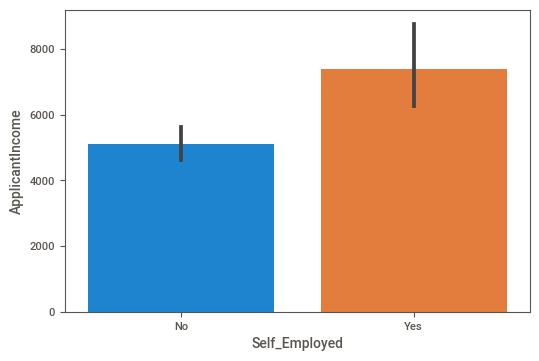

In [42]:
#applicant income by employement
sns.barplot(x='Self_Employed',y='ApplicantIncome',data=train)

In [154]:
train.groupby('Self_Employed')['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,532.0,5098.678571,6091.493638,150.0,2824.50,3698.0,5250.0,81000.0
Yes,82.0,7380.817073,5883.564795,674.0,3452.25,5809.0,9348.5,39147.0


**Graduate applicants average income is more and Applicant who are self employeed have more average .**

# 7. Comparing applicants credit history with the Loan status

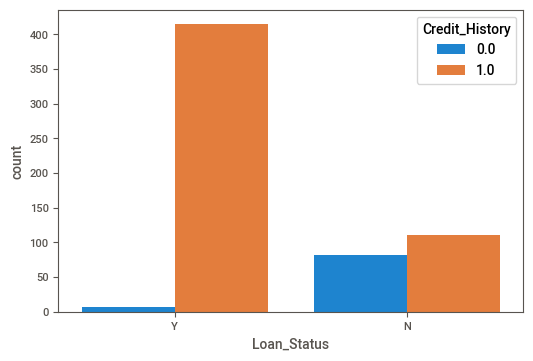

In [84]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=train)

In [155]:
train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.790476
                N              0.209524
Name: Loan_Status, dtype: float64

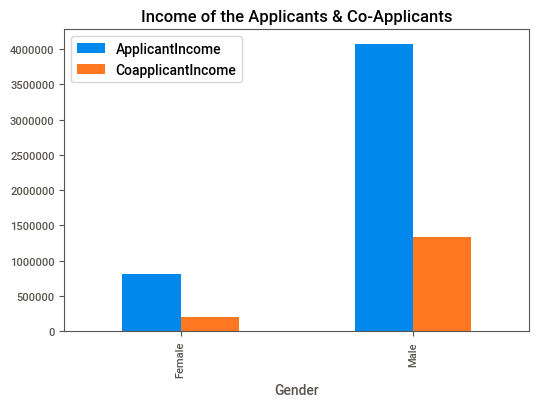

In [43]:
#Applicant and coapplicant income by gender.

df_group=df[['Gender','ApplicantIncome','CoapplicantIncome']]
df_group=df_group.groupby(['Gender']).sum()
df_group.reset_index(inplace=True)
df_group.plot(kind='bar',x='Gender',stacked=False,title='Income of the Applicants & Co-Applicants')

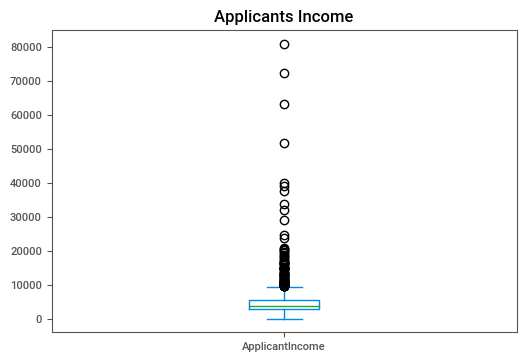

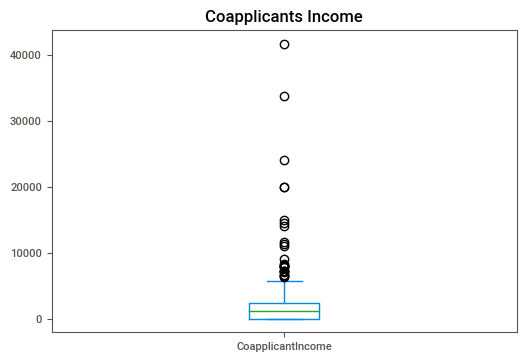

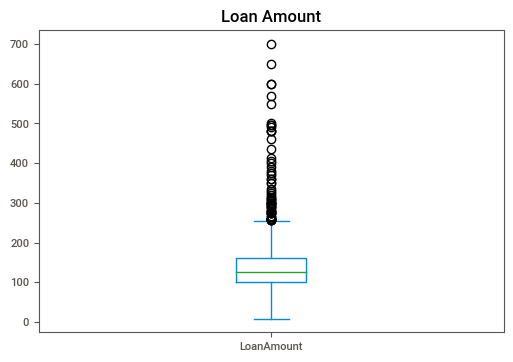

In [40]:
# The box plot for applicantIncome,coapplicantincome,loanamount to find average,min,max,interquartile range and outliers


df[['ApplicantIncome']].plot(kind ='box',title ='Applicants Income')
df[['CoapplicantIncome']].plot(kind='box',title='Coapplicants Income')
df[['LoanAmount']].plot(kind='box',title='Loan Amount')

## Your anwers:

1.The column Credit History has to change the data type from float to categorical / object for model developement 

2.There are some missing values in both the datasets , those are replaced by maximum repeating values in the respective columns

3.The average income of people who are not self employeed are less than average income of self employeed.

4.But, people who are not self employeed have loan approved than self employeed people even though they have less average than them.

5.The applicants who are graduate have more income , than non graduates

6.Male applicants income are higher than female applicants income

7. Applicants property area[Urban & Semi Urban] are approximately equal , but loan approved mostly for semi urban area.

8.Graduate applicants loan has been approved more than non graduates

9.Male applicant home loan are approved than female

10.There is a correlation between the Applicant Income and Loan Amount.

# Part Two

## Auto ML wth autosklearn


In [44]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [45]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [46]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [47]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


## Bespoke ML sklearn

### Data Preparation

**For building the Model first we are changing the datatype of Credit history in train dataset to object type**

# Feature Engineering ,Model Developement and Accuracy 

Building Model and prediction and testing the model accuracy 

In [48]:
# Changing the data type of column credit history from numberic to object 

train['Credit_History']=train['Credit_History'].astype('object')

# separating the column by datatypes object and numeric to encode the column category and object into numeric for prediction

cat= train.select_dtypes('object')
num=train.select_dtypes(include=['int64','float64'])
num.shape
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,120.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [49]:
# dropping the column loan status becuase that is the target variable and loan id which doesnt have any impact on the target variable.


cat.drop('Loan_Status',axis=1,inplace=True)
cat.drop('Loan_ID',axis=1,inplace=True)
target=train['Loan_Status']
target=target.map({'N':0,'Y':1}).astype(int)
target.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [50]:
# downloading the label encoder to change to object type columns into numeric and applying it on each column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
  cat[i]= le.fit_transform(cat[i])
cat.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [51]:

X=pd.concat([cat,num,target],axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849,0.0,120.0,360.0,1
1,1,1,1,0,0,1,0,4583,1508.0,128.0,360.0,0
2,1,1,0,0,1,1,2,3000,0.0,66.0,360.0,1
3,1,1,0,1,0,1,2,2583,2358.0,120.0,360.0,1
4,1,0,0,0,0,1,2,6000,0.0,141.0,360.0,1


In [52]:
X.shape

(614, 12)

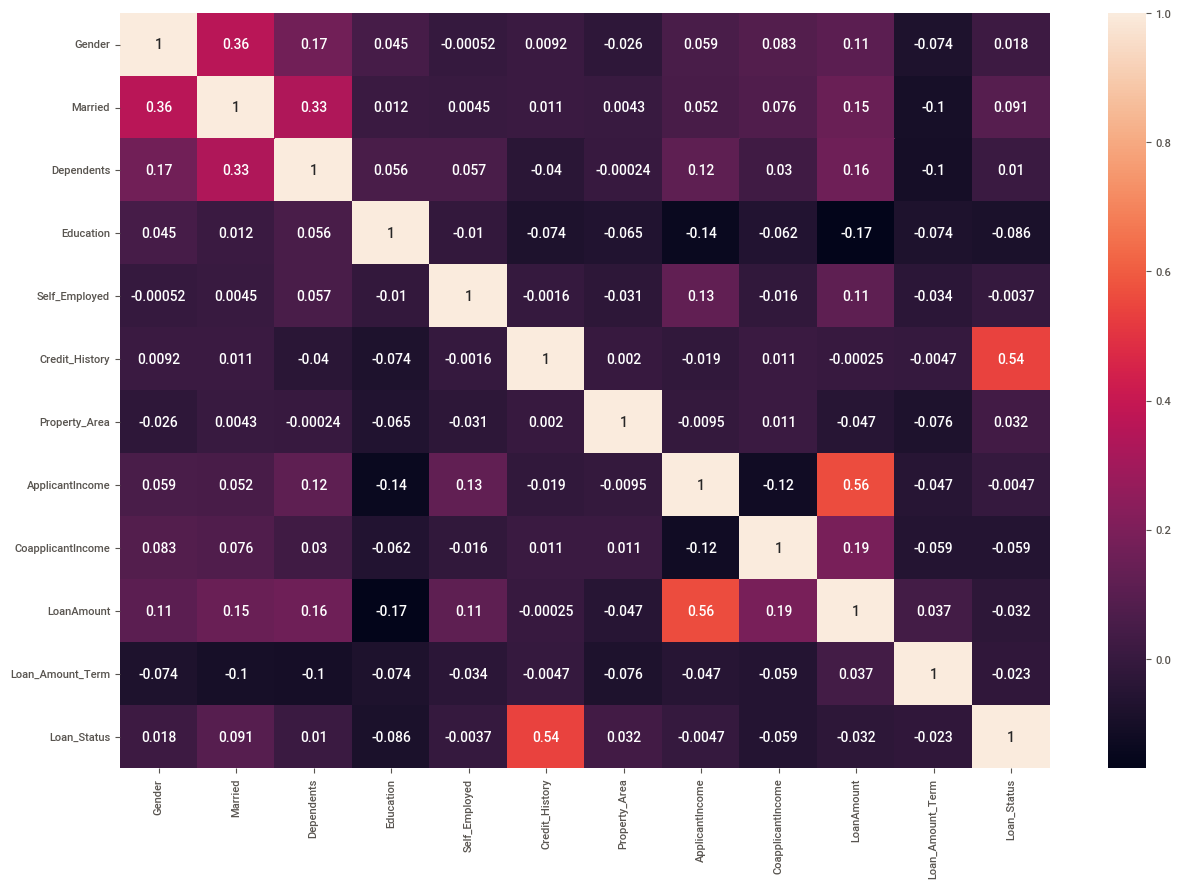

In [53]:
# correlation b/w the features   before dropping outliers

plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)

In [54]:
# Using Z score we are dropping the outliers in each columns and below dataframe shows the outliers in each columns
# for finding the z score we are using stats from scipy library

from scipy import stats
z = np.abs(stats.zscore(X))
print(z)


       Gender   Married  Dependents  Education  Self_Employed  Credit_History  \
0    0.472343  1.372089    0.737806   0.528362       0.392601        0.411733   
1    0.472343  0.728816    0.253470   0.528362       0.392601        0.411733   
2    0.472343  0.728816    0.737806   0.528362       2.547117        0.411733   
3    0.472343  0.728816    0.737806   1.892641       0.392601        0.411733   
4    0.472343  1.372089    0.737806   0.528362       0.392601        0.411733   
..        ...       ...         ...        ...            ...             ...   
609  2.117107  1.372089    0.737806   0.528362       0.392601        0.411733   
610  0.472343  0.728816    2.236021   0.528362       0.392601        0.411733   
611  0.472343  0.728816    0.253470   0.528362       0.392601        0.411733   
612  0.472343  0.728816    1.244745   0.528362       0.392601        0.411733   
613  2.117107  1.372089    0.737806   0.528362       2.547117        2.428760   

     Property_Area  Applica

In [55]:
# setting the threshold limit = 3 where 99% of values falls withing the 3 standard deviation from the mean.

threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604]), array([ 8, 10, 10, 10,  7,  9, 10,  7,  9,  7,  9,  8,  9,  7,  7, 10, 10,
        9,  9, 10,  7,  9,  9,  8,  7,  8,  9,  7,  9, 10, 10,  9,  9,  9,
       10,  9, 10,  8, 10,  8,  9]))


The first array in the row and the second array is the column where is the outlier


In [56]:
# selecting only the values which below the threshold limit
X = X[(z<3).all(axis=1)]


In [57]:
X.shape

(577, 12)

In [58]:
  X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
dtype: int64

In [59]:
# assigning the loan status target to variable y and dropping the traget variable from the dataframe x

y = X['Loan_Status']
X.drop('Loan_Status',axis=1,inplace=True)
X.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(577, 11)

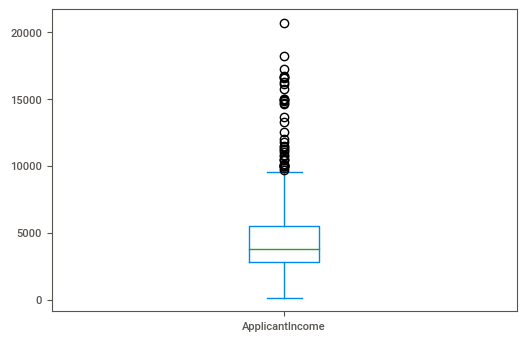

In [60]:
# checking outliers are dropped or not using box plot

X[['ApplicantIncome']].plot(kind='box')

In [61]:
y.shape

(577,)

Correlation between the Applicant income and Loan Status after dropping the outlier

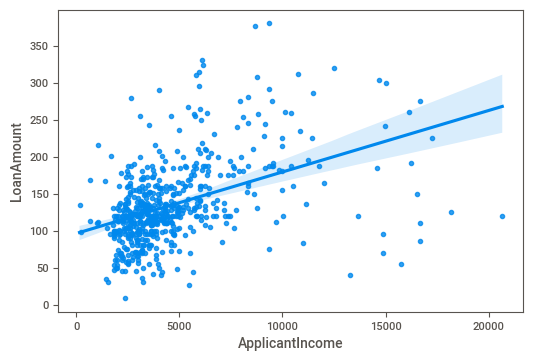

In [75]:
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=X)

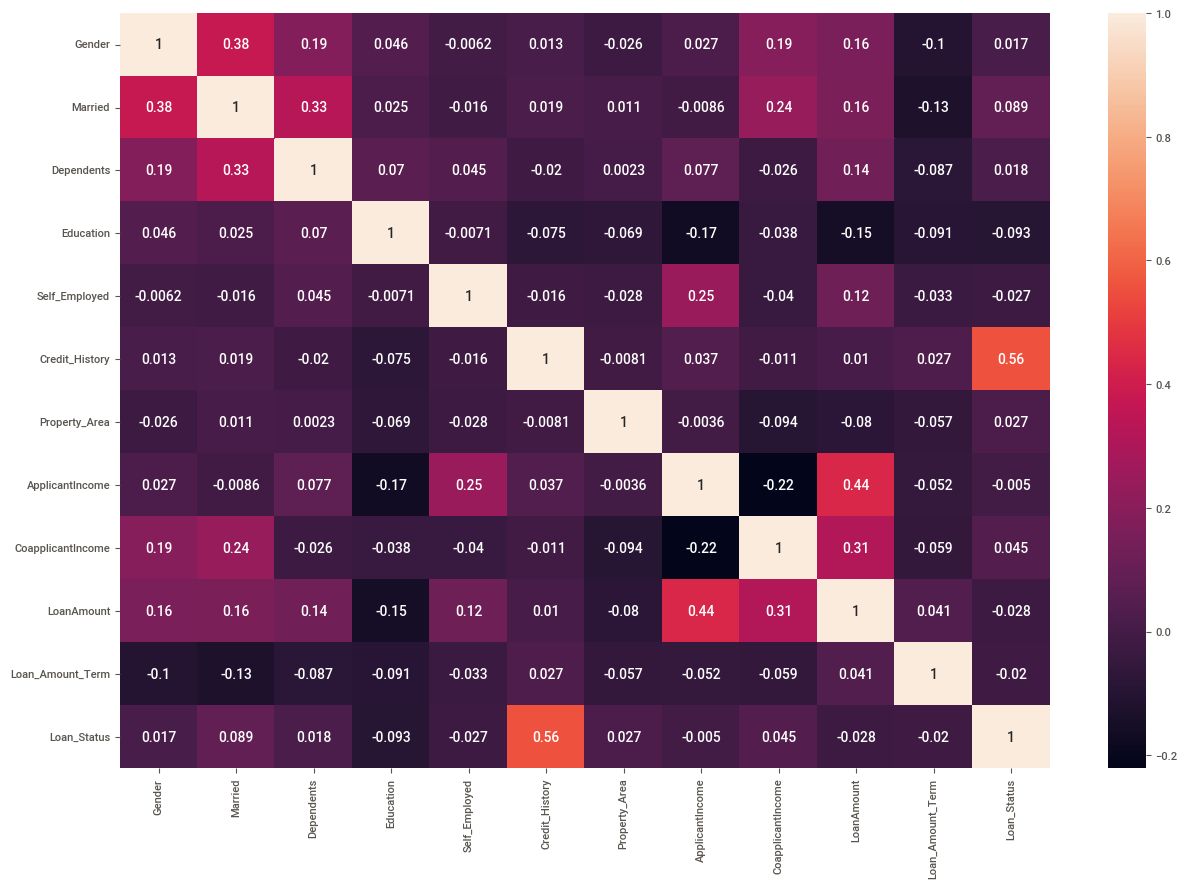

In [62]:
# checking the correaltion after dropping the outliers

data_two = pd.concat([X,y],axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(data_two.corr(),annot=True)

In [115]:
scaling = StandardScaler()
nums = ['ApplicantIncome']
for i in nums:
  X[i]= scaling.fit_transform(X[[i]])

In [117]:
nums=['CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i  in nums:
  X[i]=scaling.fit_transform(X[[i]])

In [118]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,1,2,0.399266,-0.861036,-0.267707,0.230853
1,1,1,1,0,0,1,0,-0.028020,0.052840,-0.125325,0.230853
2,1,1,0,0,1,1,2,-0.562297,-0.861036,-1.228788,0.230853
3,1,1,0,1,0,1,2,-0.703039,0.567956,-0.267707,0.230853
4,1,0,0,0,0,1,2,0.450230,-0.861036,0.106046,0.230853


In [119]:
# Matrix of features

#dataframe = train[['Education',
#'Property_Area']]




# label encode target
#y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
#X = pd.DataFrame(dataframe, columns=dataframe.columns)
#X = pd.get_dummies(X, drop_first=True)

# # train-test split

# splitting the data into train and test in train dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [121]:
# train
#prediction using logistic regression (classification algorithms)
clf = LogisticRegression() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)
predictions_clf

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1])

In [122]:
# accuracy of the model logistic regression

print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.8275862068965517


In [123]:
print(confusion_matrix(predictions_clf, y_test))

[[12  1]
 [19 84]]


In [124]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)

prediction_dt = Dt.predict(X_test)
prediction_dt

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0])

In [125]:
print('The Model Accuracy of Decision Tree :',accuracy_score(prediction_dt,y_test))

The Model Accuracy of Decision Tree : 0.7241379310344828


In [126]:
print(confusion_matrix(prediction_dt,y_test))

[[16 17]
 [15 68]]


In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

sv = SVC()
knn = KNeighborsClassifier()

In [128]:
sv.fit(X_train,y_train)
prediction_sv=sv.predict(X_test)
prediction_sv

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1])

In [129]:
knn.fit(X_train,y_train)
prediction_knn = knn.predict(X_test)
prediction_knn

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1])

In [130]:
print('The Model accuracy of sv : ',accuracy_score(prediction_sv,y_test))
print('The Model accurayv of knn :',accuracy_score(prediction_knn,y_test))
print(confusion_matrix(prediction_sv,y_test))
print(confusion_matrix(prediction_knn,y_test))

The Model accuracy of sv :  0.8275862068965517
The Model accurayv of knn : 0.7327586206896551
[[12  1]
 [19 84]]
[[ 8  8]
 [23 77]]


**From the above model accuracy we can come to conclusion that logistic regression works better than other algorithms .Next to logistic regressioin ,SVC & decision tress work better for this problem**

# Now we are going to apply it on test dataset

In [136]:
test=pd.read_csv('test.csv')

In [137]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [138]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [139]:
test_null = ['Credit_History','Self_Employed','Gender','Dependents','Loan_Amount_Term','LoanAmount']
for i in test_null:
  null=test[i].mode()[0]
  test[i] = test[[i]].fillna(null)
  print(test[i].isnull().sum())

0
0
0
0
0
0


In [140]:
test['Credit_History']= test['Credit_History'].astype('object')

In [141]:
test.drop('Loan_ID',axis=1,inplace=True)

In [142]:
test_cat= test.select_dtypes('object')
test_num = test.select_dtypes(include=['int64','float64'])

In [143]:
test_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Urban
2,Male,Yes,2,Graduate,No,1.0,Urban
3,Male,Yes,2,Graduate,No,1.0,Urban
4,Male,No,0,Not Graduate,No,1.0,Urban


In [144]:
for i in test_cat:
  test_cat[i]= le.fit_transform(test_cat[i])
test_cat.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,1,0,0,0,1,2
1,1,1,1,0,0,1,2
2,1,1,2,0,0,1,2
3,1,1,2,0,0,1,2
4,1,0,0,1,0,1,2


In [145]:
test= pd.concat([test_cat,test_num],axis=1)
test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,0,0,0,1,2,5720,0,110.0,360.0
1,1,1,1,0,0,1,2,3076,1500,126.0,360.0
2,1,1,2,0,0,1,2,5000,1800,208.0,360.0
3,1,1,2,0,0,1,2,2340,2546,100.0,360.0
4,1,0,0,1,0,1,2,3276,0,78.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,1,2,4009,1777,113.0,360.0
363,1,1,0,0,0,1,2,4158,709,115.0,360.0
364,1,0,0,0,0,1,1,3250,1993,126.0,360.0
365,1,1,0,0,0,1,0,5000,2393,158.0,360.0


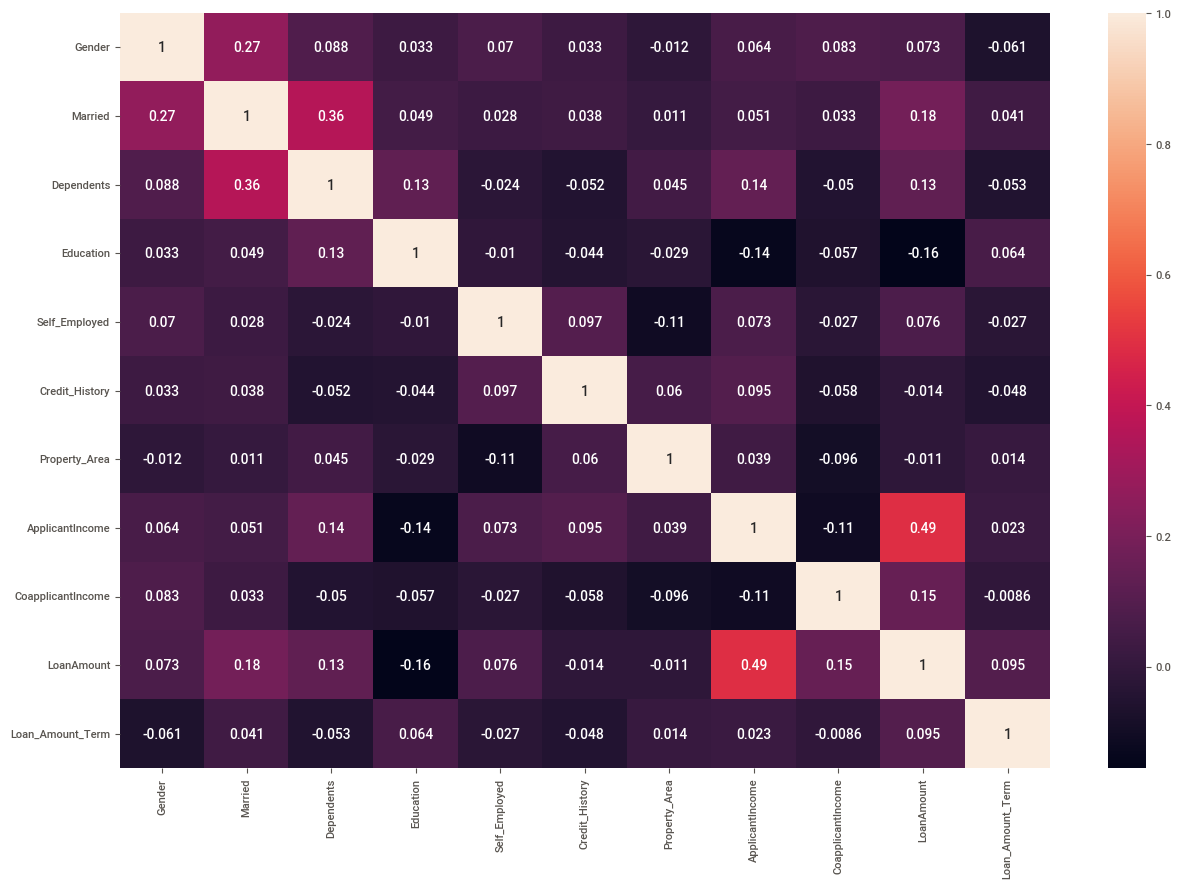

In [146]:
plt.figure(figsize=(15,10))
sns.heatmap(test.corr(),annot=True)

In [147]:
clf_test=clf.predict(test)

In [148]:
clf_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,